# Notebook Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [3]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-ham.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [5]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

# Calculating the Joint Probability

### The Dot Product

In [6]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [7]:
a.dot(b)

22

In [9]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('Shape of c is : ', c.shape)
print(c)

Shape of c is :  (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [10]:
print(a.dot(c))
print('Shape of dot product : ', a.dot(c).shape)

[21  9]
Shape of dot product :  (2,)


In [13]:
print('Shape of the dot product : ', X_test.dot(prob_token_spam).shape)

Shape of the dot product :  (1724,)


## Set the prior

$$ P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [14]:
PROB_SPAM = 0.3113

In [15]:
np.log(prob_token_spam)

array([ -4.42135003,  -5.26543762,  -5.00044696, ...,  -9.46799576,
        -8.3003906 , -10.72075873])

## Joint probbility in Log format

In [25]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)
joint_log_spam[:5]

array([22.3687453 ,  1.96668792, 17.81211985, 16.74567199, 19.55137335])

$$ P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1 - P(Spam))} {P(X)} $$

In [26]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)
joint_log_ham[:5]

array([-58.95296109, -10.8572056 , -34.75570935, -58.54737166,
       -53.09567596])

In [27]:
joint_log_ham.size

1724

# Making Predictions


## Checking for the Higher Joint Probability
$$ P(Spam \, | \, X) \, > \, P(Ham \, |\, X) \, or \, P(Spam \, | \, X) \, < \, P(Ham \, |\, X) $$

In [28]:
prediction = joint_log_spam > joint_log_ham
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [29]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [30]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [36]:
correct_doc = (y_test == prediction).sum()
print('Docs classified correctly : ', correct_doc)
numdocs_wrong = X_test.shape[0] - correct_doc
print('Docs classified incorrectly : ', numdocs_wrong)

Docs classified correctly :  1685
Docs classified incorrectly :  39


In [38]:
accuracy = correct_doc/X_test.shape[0]
accuracy

0.9773781902552204

In [42]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualising the Results

In [46]:
# Chart Styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

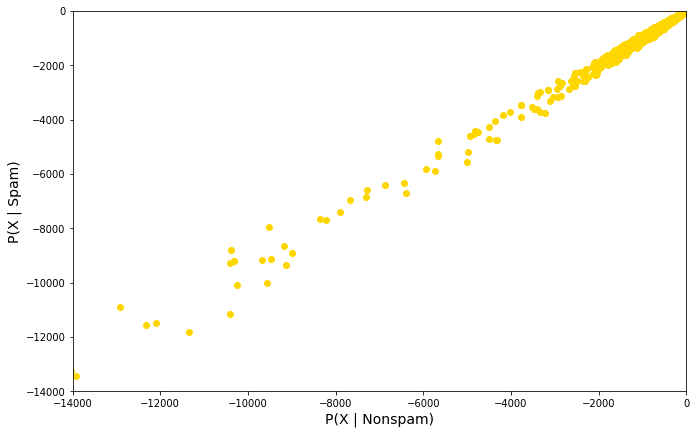

In [45]:
plt.figure(figsize = [11, 7])
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color = 'gold')
plt.show()

## Descision Boundary

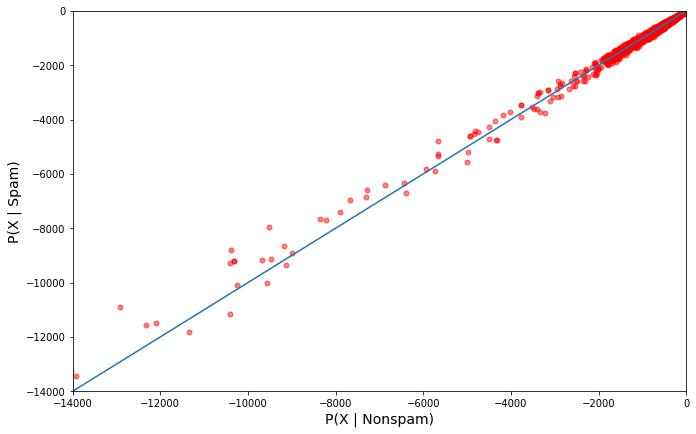

In [50]:
plt.figure(figsize = [11, 7])
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color = 'red', alpha = 0.5, s = 25)
plt.plot(linedata, linedata)
plt.show()

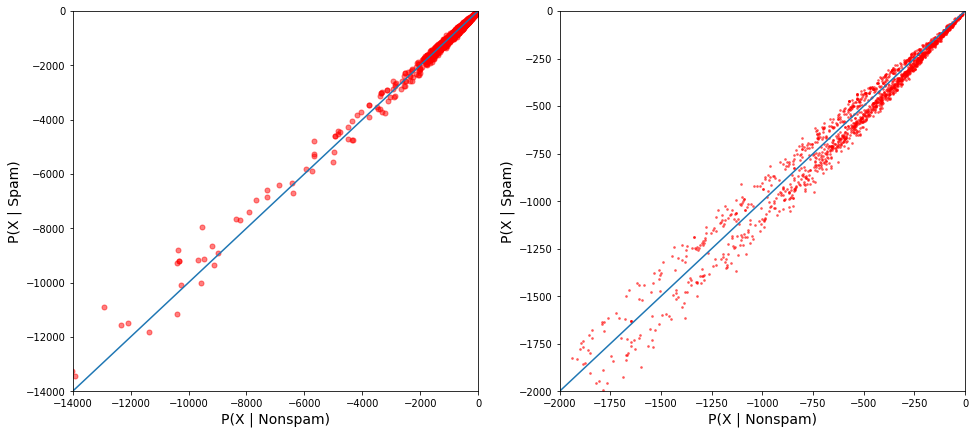

In [51]:
plt.figure(figsize = [16, 7])

plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color = 'red', alpha = 0.5, s = 25)
plt.plot(linedata, linedata)

plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color = 'red', alpha = 0.5, s = 3)
plt.plot(linedata, linedata)

plt.show()

In [52]:
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label : joint_log_spam, xaxis_label : joint_log_ham, labels : y_test})

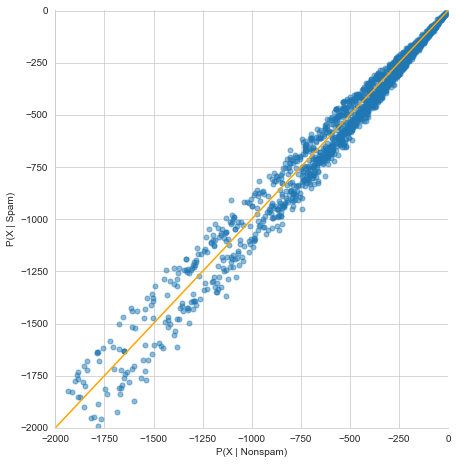

In [61]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg = False, 
           scatter_kws = {'alpha' : 0.5, 's' : 25})
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color = 'orange')

plt.show()

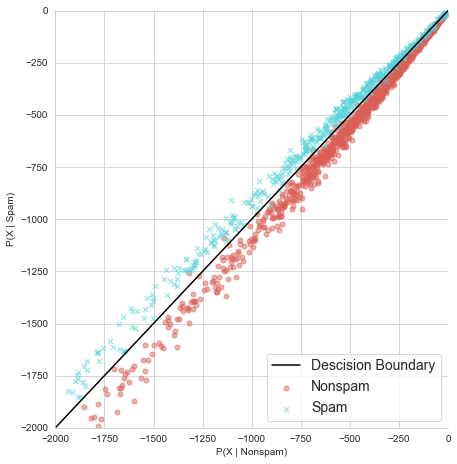

In [72]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg = False, legend = False,
           scatter_kws = {'alpha' : 0.5, 's' : 25}, hue = labels, markers = ['o', 'x'], palette = 'hls')
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Descision Boundary', 'Nonspam', 'Spam'), loc = 'lower right', fontsize = 14)

plt.show()

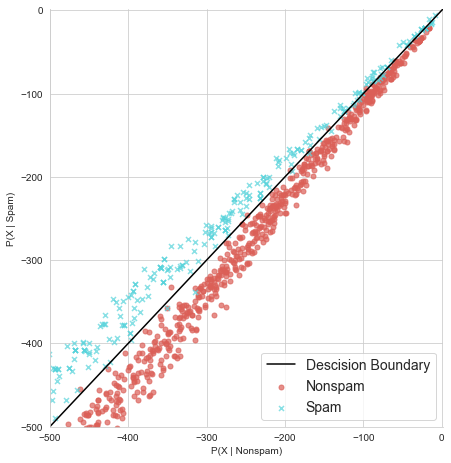

In [74]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg = False, legend = False,
           scatter_kws = {'alpha' : 0.7, 's' : 25}, hue = labels, markers = ['o', 'x'], palette = 'hls')
plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color = 'black')

plt.legend(('Descision Boundary', 'Nonspam', 'Spam'), loc = 'lower right', fontsize = 14)

plt.show()

## False positives and False negatives

In [75]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1138,  586], dtype=int64))

In [76]:
true_pos = (y_test == 1) & (prediction == 1)

In [77]:
true_pos.sum()

568

In [78]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

18

In [82]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

21

In [81]:
true_neg = (y_test == 0) & (prediction == 0)
true_neg.sum()

1117

## Recal score

In [84]:
recal_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
print('The recal score is {:.2%}'.format(recal_score))

The recal score is 96.43%


## Precision Score

In [85]:
precision_score = true_pos.sum()/(true_pos.sum() + false_pos.sum())
print('The precision score is {:.2%}'.format(precision_score))

The precision score is 96.93%


## F - Score or F1 Score

In [86]:
f1_score = 2*precision_score*recal_score / (precision_score + recal_score)
print('The F1 Score is {:.2%}'.format(f1_score))

The F1 Score is 96.68%
